In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Lire le csv
df = pd.read_csv("parcours_explorateurs.csv", low_memory=False)
df

,noeud_amont,noeud_aval,type_aretes,distance,arete_id
0,sommet_15,sommet_95,chemin,16.980936,arete_6
1,sommet_45,sommet_38,chemin,11.317052,arete_25
2,sommet_28,sommet_72,arrivee,2.690543,arete_85
3,sommet_2,sommet_65,chemin,14.328168,arete_7
4,sommet_98,sommet_18,chemin,13.542829,arete_26
...,...,...,...,...,...
85,sommet_21,sommet_29,chemin,5.556694,arete_64
86,sommet_70,sommet_15,chemin,8.202683,arete_40
87,sommet_13,sommet_75,chemin,13.359543,arete_19
88,sommet_0,sommet_4,chemin,19.516010,arete_37


In [27]:
#Dictionnaire des relations amont-aval

noeuds_depart = []
noeuds_arrivee = []
relations_amont_aval = {}

# Utiliser une boucle while
explorateurs = df['arete_id'].unique()
i = 0

while i < len(explorateurs):
    explorateur = explorateurs[i]
    
    # Filtrer les données 
    trajet_explorateur = df[df['arete_id'] == explorateur]
    
    # si le trajet est vide
    if trajet_explorateur.empty:
        i += 1
        continue
    
    noeuds_depart.append(trajet_explorateur.iloc[0]['noeud_amont'])
    
    noeuds_arrivee.append(trajet_explorateur.iloc[-1]['noeud_aval'])
    
    relations_amont_aval.update({sommet_amont: relations_amont_aval.get(sommet_amont, []) + [sommet_aval]
                                  for sommet_amont, sommet_aval in zip(trajet_explorateur['noeud_amont'], trajet_explorateur['noeud_aval'])})
    
    i += 1

print("Liste des nœuds de départ :", noeuds_depart)
print("Liste des nœuds d'arrivée :", noeuds_arrivee)

print("Dictionnaire des relations amont-aval :", relations_amont_aval)


Liste des nœuds de départ : ['sommet_15', 'sommet_45', 'sommet_28', 'sommet_2', 'sommet_98', 'sommet_94', 'sommet_33', 'sommet_18', 'sommet_80', 'sommet_57', 'sommet_96', 'sommet_17', 'sommet_38', 'sommet_85', 'sommet_35', 'sommet_10', 'sommet_42', 'sommet_51', 'sommet_97', 'sommet_46', 'sommet_12', 'sommet_43', 'sommet_67', 'sommet_59', 'sommet_30', 'sommet_65', 'sommet_91', 'sommet_56', 'sommet_50', 'sommet_11', 'sommet_29', 'sommet_53', 'sommet_71', 'sommet_79', 'sommet_14', 'sommet_24', 'sommet_89', 'sommet_31', 'sommet_78', 'sommet_48', 'sommet_26', 'sommet_34', 'sommet_40', 'sommet_8', 'sommet_36', 'sommet_23', 'sommet_54', 'sommet_3', 'sommet_100', 'sommet_27', 'sommet_16', 'sommet_58', 'sommet_37', 'sommet_83', 'sommet_69', 'sommet_47', 'sommet_82', 'sommet_49', 'sommet_62', 'sommet_76', 'sommet_55', 'sommet_75', 'sommet_93', 'sommet_73', 'sommet_63', 'sommet_60', 'sommet_61', 'sommet_39', 'sommet_84', 'sommet_87', 'sommet_81', 'sommet_77', 'sommet_86', 'sommet_32', 'sommet_52'

In [26]:
# Calculer la longueur de chaque chemin
longueurs_chemins = df.groupby('arete_id')['distance'].sum()

# Trouver le chemin le plus long et le plus court
chemin_plus_long = longueurs_chemins.idxmax()
chemin_plus_court = longueurs_chemins.idxmin()

# Calculer les métriques
moyenne = longueurs_chemins.mean()
median = longueurs_chemins.median()
ecart_type = longueurs_chemins.std()
ecart_interquartile = longueurs_chemins.quantile(0.75) - longueurs_chemins.quantile(0.25)

print("Chemin le plus long:", chemin_plus_long)
print("Longueur du chemin le plus long:", longueurs_chemins.max())
print("Chemin le plus court:", chemin_plus_court)
print("Longueur du chemin le plus court:", longueurs_chemins.min())
print("Moyenne des longueurs de chemin:", moyenne)
print("Médiane des longueurs de chemin:", median)
print("Écart-type des longueurs de chemin:", ecart_type)
print("Écart interquartile des longueurs de chemin:", ecart_interquartile)


Chemin le plus long: arete_38
Longueur du chemin le plus long: 19.992527286552747
Chemin le plus court: arete_81
Longueur du chemin le plus court: 0.0791390788968415
Moyenne des longueurs de chemin: 10.72752032051424
Médiane des longueurs de chemin: 10.85907895595545
Écart-type des longueurs de chemin: 5.616327787001578
Écart interquartile des longueurs de chemin: 10.064919312861923


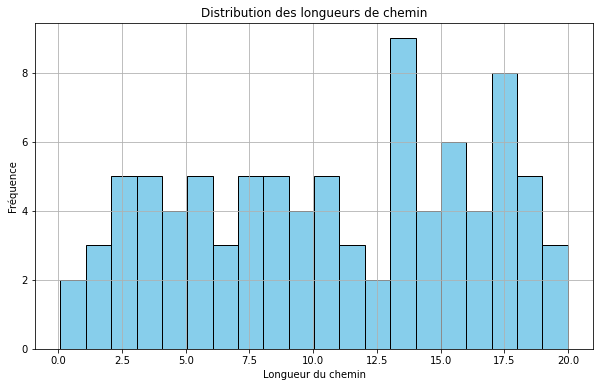

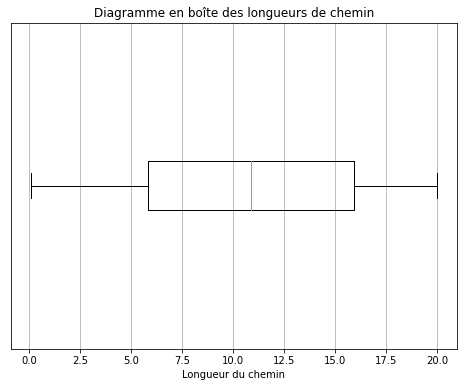

In [30]:
#diagramme en boxplot pour voir les mesures de dispersion 
#un histogramme des longueurs de chemin pour visualiser la distribution


# Calculer la longueur de chaque chemin
longueurs_chemins = df.groupby('arete_id')['distance'].sum()

# longueur chemin histograme
plt.figure(figsize=(10, 6))
plt.hist(longueurs_chemins, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution des longueurs de chemin')
plt.xlabel('Longueur du chemin')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

# longueurs de chemin en boîte
plt.figure(figsize=(8, 6))
plt.boxplot(longueurs_chemins, vert=False)
plt.title('Diagramme en boîte des longueurs de chemin')
plt.xlabel('Longueur du chemin')
plt.yticks([])
plt.grid(True)
plt.show()
